Winston Zhuang wz225 
Fall 2022 CDS Semester Project

Source: 
https://www.kaggle.com/datasets/residentmario/ramen-ratings 

Question: What continent generally has the best ramen? Can the rating of ramen be used to accurately guess it's continent of origin?

Hypothesis: Asian ramen will likely be the best due to noodle dishes such as ramen originating from that region of the world. With this assumption I hypothesize that rating of ramen can be used to guess what continent it comes from. 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier

In [3]:
df=pd.read_csv('new-ramen.csv')
df=df.drop(['Review #','T'],axis=1)
df = df[df['Stars'].str.contains('Unrated')==False]
df = df[df['Stars'].str.contains('NS')==False]
df = df[df['Stars'].str.contains('NR')==False]
df = df[df['Stars'].str.contains('/')==False]
df=df.astype({'Stars':'float'})
countrygroup=df[['Country','Stars']]
brandgroup=df[['Country','Brand','Stars']]

The dataframe countrygroup did not provide me with the information I wanted which was the mean of each countries' Star Rating. To do this I implemented the code below which would group rows of data by country and find the mean of those groups. I also created a column which would say which continent that respective row's country belonged to as well as counting the number of times the country's data is within the data set as occurences. 

In [4]:
Euro=['Andorra', 'Albania', 'Austria', 'Belgium', 'Bulgaria', 'Belarus', 'Czech Republic', 'Germany', 'Denmark', 'Estonia', 'Finland', 'France', 'Greece', 'Holland', 'Hungary', 'Ireland', 'Iceland', 'Italy', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Latvia', 'Macedonia', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'Russian Federation', 'Sweden', 'Slovenia', 'Slovakia', 'San Marino', 'Ukraine', 'Vatican City', 'Bosnia and Herzegovina', 'Croatia', 'Moldova', 'Monaco', 'Montenegro', 'Serbia', 'Spain', 'Switzerland', 'United Kingdom']
Asi=['Afghanistan', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Bahrain', 'Brunei', 'Bhutan', "China", 'Cyprus', 'Dubai', 'Georgia', 'Hong Kong', 'Indonesia', 'Israel', 'India', 'Iraq', 'Iran', 'Jordan', 'Japan', 'Kyrgyzstan', 'North Korea', 'South Korea', 'Souh Korea', 'Kuwait', 'Lebanon', 'Myanmar', 'Mongolia', 'Maldives', 'Malaysia', 'Nepal', 'Oman', 'Philippines', 'Phlippines', 'Pakistan', 'Qatar', 'Saudi Arabia', 'Sarawak', 'Singapore', 'Syria', 'Thailand', 'Tajikistan', 'Taiwan', 'Turkmenistan', 'Turkey', 'Uzbekistan', 'Vietnam', 'Yemen', 'Cambodia', 'East Timor', 'Kazakhstan', 'Laos', 'Sri Lanka', 'United Arab Emirates']
NAmerica=['Antigua and Barbuda', 'Barbados', 'Bahamas', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Trinidad and Tobago', 'United States', 'USA', 'UK', 'El Salvador', 'Grenada', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines']
Afri=['Angola', 'Burkina Faso', 'Burundi', 'Benin', 'Botswana', 'Democratic Republic of the Congo', 'Republic of the Congo', 'Ivory Coast', 'Cameroon', 'Cape Verde', 'Djibouti', 'Egypt', 'Eritrea', 'Ethiopia', 'Gabon', 'Ghana', 'The Gambia', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Liberia', 'Lesotho', 'Libya', 'Madagascar', 'Mali', 'Mauritania', 'Mauritius', 'Malawi', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Seychelles', 'Sudan', 'Sierra Leone', 'Senegal', 'Somalia', 'Sao Tome and Principe', 'Togo', 'Tunisia', 'Tanzania', 'Uganda', 'Zambia', 'Zimbabwe', 'Algeria', 'Central African Republic', 'Chad', 'Comoros', 'Equatorial Guinea', 'Morocco', 'South Africa', 'Swaziland']
SAmerica=['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Peru', 'Paraguay', 'Suriname', 'Uruguay', 'Venezuela']
Oce=['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Nauru', 'New Zealand', 'Papua New Guinea', 'Palau', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu', 'Federated States of Micronesia', 'Samoa']
World=['Andorra', 'Albania', 'Austria', 'Belgium', 'Bulgaria', 'Belarus', 'Czech Republic', 'Germany', 'Denmark', 'Estonia', 'Finland', 'France', 'Greece', 'Holland', 'Hungary', 'Ireland', 'Iceland', 'Italy', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Latvia', 'Macedonia', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'Russian Federation', 'Sweden', 'Slovenia', 'Slovakia', 'San Marino', 'Ukraine', 'Vatican City', 'Bosnia and Herzegovina', 'Croatia', 'Moldova', 'Monaco', 'Montenegro', 'Serbia', 'Spain', 'Switzerland', 'United Kingdom', 'Afghanistan', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Bahrain', 'Brunei', 'Bhutan', "China", 'Cyprus', 'Dubai', 'Georgia', 'Hong Kong', 'Indonesia', 'Israel', 'India', 'Iraq', 'Iran', 'Jordan', 'Japan', 'Kyrgyzstan', 'North Korea', 'South Korea', 'Souh Korea', 'Kuwait', 'Lebanon', 'Myanmar', 'Mongolia', 'Maldives', 'Malaysia', 'Nepal', 'Oman', 'Philippines', 'Phlippines', 'Pakistan', 'Qatar', 'Saudi Arabia', 'Sarawak', 'Singapore', 'Syria', 'Thailand', 'Tajikistan', 'Taiwan', 'Turkmenistan', 'Turkey', 'Uzbekistan', 'Vietnam', 'Yemen', 'Cambodia', 'East Timor', 'Kazakhstan', 'Laos', 'Sri Lanka', 'United Arab Emirates', 'Antigua and Barbuda', 'Barbados', 'Bahamas', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Trinidad and Tobago', 'United States', 'USA', 'UK', 'El Salvador', 'Grenada', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Angola', 'Burkina Faso', 'Burundi', 'Benin', 'Botswana', 'Democratic Republic of the Congo', 'Republic of the Congo', 'Ivory Coast', 'Cameroon', 'Cape Verde', 'Djibouti', 'Egypt', 'Eritrea', 'Ethiopia', 'Gabon', 'Ghana', 'The Gambia', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Liberia', 'Lesotho', 'Libya', 'Madagascar', 'Mali', 'Mauritania', 'Mauritius', 'Malawi', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Seychelles', 'Sudan', 'Sierra Leone', 'Senegal', 'Somalia', 'Sao Tome and Principe', 'Togo', 'Tunisia', 'Tanzania', 'Uganda', 'Zambia', 'Zimbabwe', 'Algeria', 'Central African Republic', 'Chad', 'Comoros', 'Equatorial Guinea', 'Morocco', 'South Africa', 'Swaziland', 'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Peru', 'Paraguay', 'Suriname', 'Uruguay', 'Venezuela', 'Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Nauru', 'New Zealand', 'Papua New Guinea', 'Palau', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu', 'Federated States of Micronesia', 'Samoa']
countrygroup=countrygroup.groupby(['Country'])['Stars'].mean().to_frame(name='Star Mean').reset_index()
countrygroup['Continent']=0
for x in range(0,len(countrygroup)):
    if countrygroup['Country'][x] in Euro:
        countrygroup['Continent'][x]='Europe'
    elif countrygroup['Country'][x] in Asi:
        countrygroup['Continent'][x]='Asia'
    elif countrygroup['Country'][x] in NAmerica:
        countrygroup['Continent'][x]='North America'
    elif countrygroup['Country'][x] in Afri:
        countrygroup['Continent'][x]='Africa'
    elif countrygroup['Country'][x] in SAmerica:
        countrygroup['Continent'][x]='South America'
    elif countrygroup['Country'][x] in Oce:
        countrygroup['Continent'][x]='Oceania'

countrylist=df['Country'].tolist()
inworld=list(set(countrylist) & set(World))
inworld.sort()
countrylist.sort()
countrygroup['Occurences']=0
for i in range(len(inworld)):
    countrygroup['Occurences'][i]=(countrylist.count(inworld[i]))
countrygroup
    

/var/folders/mt/9xhddl7j2n3cf35xfmgnl0vc0000gn/T/ipykernel_3102/2382353238.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrygroup['Continent'][x]='Oceania'
/var/folders/mt/9xhddl7j2n3cf35xfmgnl0vc0000gn/T/ipykernel_3102/2382353238.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrygroup['Occurences'][i]=(countrylist.count(inworld[i]))


,Country,Star Mean,Continent,Occurences
0,Australia,3.260000,Oceania,25
1,Bangladesh,3.479167,Asia,12
2,Brazil,3.645833,South America,24
3,Cambodia,4.200000,Asia,5
4,Canada,2.330357,North America,56
5,China,3.563112,Asia,286
6,Colombia,3.291667,South America,6
7,Dubai,3.583333,Asia,3
8,Estonia,3.500000,Europe,2
9,Fiji,3.875000,Oceania,4


The code below is a series of if/elif statements which sifts through all of the countries in the countrygroup dataframe and determines the 5 countries with the highest star mean rating. The result reveals that top five highest star mean rating countries are respectively: France, Malaysia, Singapore, Spain, and Taiwan (Two european countries and two asian countries ). This result supports my hypothesis that Asian countries generally have better ramen than other regions of the world, however, it is quite shocking to see France in the number 1 spot because the French aren't generally known for their ramen. 

In [5]:
firstcountry=[0,0]
secondcountry=[0,0]
thirdcountry=[0,0]
fourthcountry=[0,0]
fifthcountry=[0,0]
for i in range(len(countrygroup)):
    if countrygroup.iloc[i][1] > float(firstcountry[1]):
        firstcountry=countrygroup.iloc[i]
    elif countrygroup.iloc[i][1] == float(firstcountry[1]):
        firstcountry=pd.concat([firstcountry,countrygroup.iloc[i]])

    elif countrygroup.iloc[i][1] < float(firstcountry[1]) and countrygroup.iloc[i][1] > float(secondcountry[1]):
        secondcountry=countrygroup.iloc[i]
    elif countrygroup.iloc[i][1] == float(firstcountry[1]):
        secondcountry=pd.concat([secondcountry,countrygroup.iloc[i]])

    elif countrygroup.iloc[i][1] < float(secondcountry[1]) and countrygroup.iloc[i][1] > float(thirdcountry[1]):
        thirdcountry=countrygroup.iloc[i]
    elif countrygroup.iloc[i][1] == float(firstcountry[1]):
        thirdcountry=pd.concat([thirdcountry,countrygroup.iloc[i]])

    elif countrygroup.iloc[i][1] < float(thirdcountry[1]) and countrygroup.iloc[i][1] > float(fourthcountry[1]):
        fourthcountry=countrygroup.iloc[i]
    elif countrygroup.iloc[i][1] == float(firstcountry[1]):
        fourthcountry=pd.concat([fourthcountry,countrygroup.iloc[i]])

    elif countrygroup.iloc[i][1] < float(fourthcountry[1]) and countrygroup.iloc[i][1] > float(fifthcountry[1]):
        fifthcountry=countrygroup.iloc[i]
    elif countrygroup.iloc[i][1] == float(firstcountry[1]):
        fifthcountry=pd.concat([fifthcountry,countrygroup.iloc[i]])

c1=''
c2=''
c3=''
c4=''
c5=''

for ah in range(len(firstcountry)):
    if ah%2==0:
        c1 += (firstcountry[ah]) + ', '
c1=c1.rstrip(', ')
    
for beh in range(len(secondcountry)):
    if beh%2==0:
        c2 += (secondcountry[beh]) + ', '
c2=c2.rstrip(', ')

for ceh in range(len(thirdcountry)):
    if ceh%2==0:
        c3 += (thirdcountry[ceh]) + ', '
c3=c3.rstrip(', ')

for deh in range(len(fourthcountry)):
    if deh%2==0:
        c4 += (fourthcountry[deh]) + ', '
c4=c4.rstrip(', ')

for eh in range(len(fifthcountry)):
    if eh%2==0:
        c5 += (fifthcountry[eh]) + ', '
c5=c5.rstrip(', ')

print("First Place Country(ies) & Star Rating")
print(firstcountry[1])
print(c1)
print("Second Place Country(ies) & Star Rating")
print(secondcountry[1])
print(c2)
print("Third Place Country(ies) & Star Rating")
print(thirdcountry[1])
print(c3)
print("Fourth Place Country(ies) & Star Rating")
print(fourthcountry[1])
print(c4)
print("Fifth Place Country(ies) & Star Rating")
print(fifthcountry[1])
print(c5)

First Place Country(ies) & Star Rating
4.333333333333333
France, Europe
Second Place Country(ies) & Star Rating
4.206222222222222
Malaysia, Asia
Third Place Country(ies) & Star Rating
4.109375
Singapore, Asia
Fourth Place Country(ies) & Star Rating
4.0
Spain, Europe
Fifth Place Country(ies) & Star Rating
3.913456790123457
Taiwan, Asia


Below, continent of origin was predicted by using star mean and # of occurences. A logistic regression model was used as a simple classifier, the model yielded a training score of 0.577 and a test score of 0.625. These results suggest a slight association can between continent of origin and star mean + # of occurences. 

In [6]:
countryfeature = countrygroup[["Star Mean", "Occurences"]]
countrytarget = countrygroup["Continent"]
x_train, x_test, y_train, y_test = train_test_split(countryfeature,countrytarget,test_size=0.15,random_state=42)
log = LogisticRegression()
log.fit(x_train, y_train)
knn_pred_train = log.predict(x_train)
knn_pred_test = log.predict(x_test)
print("Train Accuracy: ", accuracy_score(y_train, knn_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, knn_pred_test))

Train Accuracy:  0.5777777777777777
Test Accuracy:  0.625


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Below is a second attempt at predicting continent of origin based off a ramen brand's star rating and # of occurences. This attempt used a random forest classifier instead of a KNN model. The hope was to compare the performance of the models. Interestingly, both models had the same test accuracy score of 0.625. The depth that performed the best was 3 which suggests at max there were only 8 leaves needed to classify a ramen's continent of origins with 0.625 accuracy.

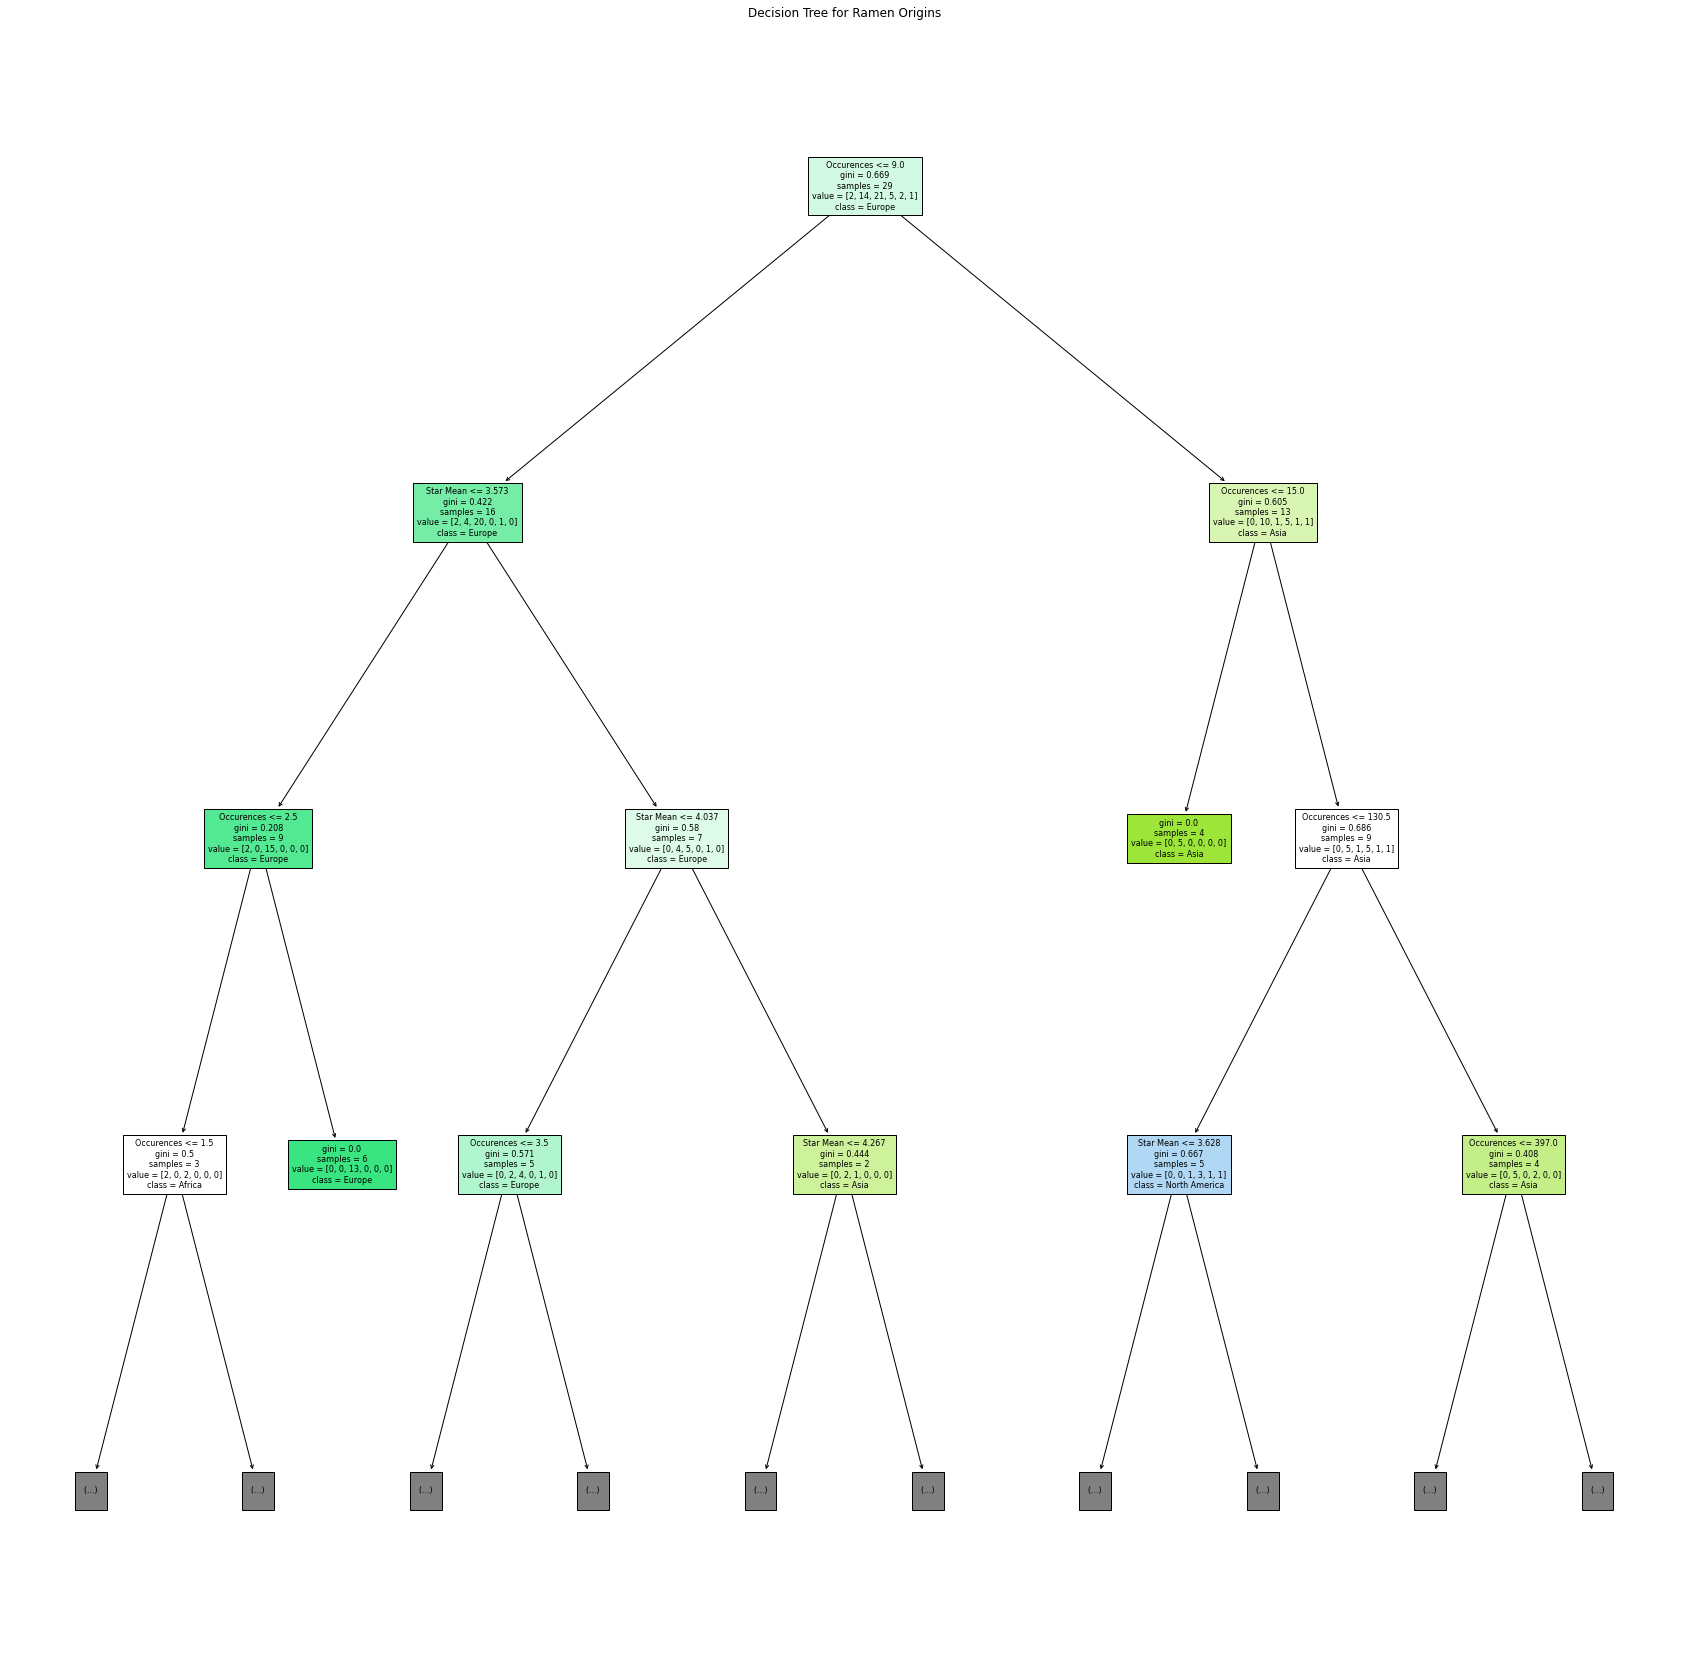

Best Accuracy Prediction Score: 0.625
Best Depth Value: 3


In [7]:
best_depth = 1
best_accuracy = 0 
acc=[]
depthlist=[]
feature=countrygroup[['Star Mean','Occurences']]
target=countrygroup['Continent']
x_train, x_test, y_train, y_test = train_test_split(feature,target,test_size=0.15,random_state=42)

for depth in range (1,31):
    model = RandomForestClassifier(n_estimators = 20, max_depth=depth, random_state=42)
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    accuracy_test= accuracy_score(y_test, predictions)
    acc.append(accuracy_test)
    depthlist.append(depth)
    if best_accuracy < accuracy_test:
        best_depth=depth
        best_accuracy=accuracy_test
    else: 
        best_depth=best_depth
        best_accuracy=best_accuracy

single_tree = model.estimators_[0]

plt.figure(figsize=(30,30))
tree.plot_tree(single_tree,max_depth=best_depth, filled=True, class_names=['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'], feature_names=('Star Mean','Occurences'), fontsize=8)
plt.title("Decision Tree for Ramen Origins")
plt.show()
print("Best Accuracy Prediction Score: " +str(best_accuracy))
print("Best Depth Value: " + str(best_depth))

The code below determines the brands with the top five highest Star ratings as well as their country of origin. A new data frame is displayed to show the country of origin for the brands, the star rating, and in the case of duplicate brands with the same star rating (specifically with a perfect 5 star rating) multiple brands become displayed for a single star rating and are then ranked according to occurences each country has of a brand with said star rating. The primary goal was to show which countries have the highest ranked brands, how many each country has, and what the respective brands are.

In [8]:
brandgroup=brandgroup.groupby(['Country','Brand'])['Stars'].mean().to_frame(name='Star Mean').reset_index()
firstbrand=[0,0,0]
secondbrand=[0,0,0]
thirdbrand=[0,0,0]
fourthbrand=[0,0,0]
fifthbrand=[0,0,0]
for i in range(len(brandgroup)):
    if brandgroup.iloc[i][2] > float(firstbrand[2]):
        firstbrand=brandgroup.iloc[i]
    elif brandgroup.iloc[i][2] == float(firstbrand[2]):
        firstbrand=pd.concat([firstbrand,brandgroup.iloc[i]])

    elif brandgroup.iloc[i][2] < float(firstbrand[2]) and brandgroup.iloc[i][2] > float(secondbrand[2]):
        secondbrand=brandgroup.iloc[i]
    elif brandgroup.iloc[i][2] == float(firstbrand[2]):
        secondbrand=pd.concat([secondbrand,brandgroup.iloc[i]])

    elif brandgroup.iloc[i][2] < float(secondbrand[2]) and brandgroup.iloc[i][2] > float(thirdbrand[2]):
        thirdbrand=brandgroup.iloc[i]
    elif brandgroup.iloc[i][2] == float(firstbrand[2]):
        thirdbrand=pd.concat([thirdbrand,brandgroup.iloc[i]])

    elif brandgroup.iloc[i][2] < float(thirdbrand[2]) and brandgroup.iloc[i][2] > float(fourthbrand[2]):
        fourthbrand=brandgroup.iloc[i]
    elif brandgroup.iloc[i][2] == float(firstbrand[2]):
        fourthbrand=pd.concat([fourthbrand,brandgroup.iloc[i]])

    elif brandgroup.iloc[i][2] < float(fourthbrand[2]) and brandgroup.iloc[i][2] > float(fifthbrand[2]):
        fifthbrand=brandgroup.iloc[i]
    elif brandgroup.iloc[i][2] == float(firstbrand[2]):
        fifthbrand=pd.concat([fifthbrand,brandgroup.iloc[i]])

b1=''
b2=''
b3=''
b4=''
b5=''

for ah in range(len(firstbrand)):
    if ah%3==1:
        b1 += (firstbrand[ah]) + ', '
b1=b1.rstrip(', ')
    
for beh in range(len(secondbrand)):
    if beh%3==1:
        b2 += (secondbrand[beh]) + ', '
b2=b2.rstrip(', ')

for ceh in range(len(thirdbrand)):
    if ceh%3==1:
        b3 += (thirdbrand[ceh]) + ', '
b3=b3.rstrip(', ')

for deh in range(len(fourthbrand)):
    if deh%3==1:
        b4 += (fourthbrand[deh]) + ', '
b4=b4.rstrip(', ')

for eh in range(len(fifthbrand)):
    if eh%3==1:
        b5 += (fifthbrand[eh]) + ', '
b5=b5.rstrip(', ')

co1=''
co2=''
co3=''
co4=''
co5=''

for ah in range(len(firstbrand)):
    if ah%3==0:
        co1 += (firstbrand[ah]) + ', '
co1=co1.rstrip(', ')
    
for beh in range(len(secondbrand)):
    if beh%3==0:
        co2 += (secondbrand[beh]) + ', '
co2=co2.rstrip(', ')

for ceh in range(len(thirdbrand)):
    if ceh%3==0:
        co3 += (thirdbrand[ceh]) + ', '
co3=co3.rstrip(', ')

for deh in range(len(fourthbrand)):
    if deh%3==0:
        co4 += (fourthbrand[deh]) + ', '
co4=co4.rstrip(', ')

for eh in range(len(fifthbrand)):
    if eh%3==0:
        co5 += (fifthbrand[eh]) + ', '
co5=co5.rstrip(', ')

For further clarification on multiple brands with the same star rating. Taiwan is ranked number 1 because they have the most occurences of a brand from their country with a 5 star rating. 

In [9]:

print("Highest Star Rated Brand(s), Country & Star Rating")
print(b1)
co1=co1.split(',')
for i in range(len(co1)):
    co1[i]=co1[i].rstrip(',')
    co1[i]=co1[i].lstrip(' ')
topcountry=set()
for i in co1:
    topcountry.add(i)
topcountry=list(topcountry)
nums=[]
for c in range(len(topcountry)):
    nums.append(co1.count(topcountry[c]))
places=[]
for i in range(len(topcountry)):
    places.append(i+1)
places.sort()
ndat={'Country':topcountry,'Star Rating':firstbrand[2],'Occurences':nums}
newdat=pd.DataFrame(ndat)
newdat=newdat.sort_values('Occurences',ascending=False)
newdat.insert(0,'Ranking',places)
firstdat=newdat.set_index('Ranking')
firstdat



Highest Star Rated Brand(s), Country & Star Rating
Maggi, Plats Du Chef, Sapporo Ichiban, Baman, Boys & Girls, Double Mountain, Kou Da Xiang, Mr. Meng, Qi Shi Liu Ren, Qinsheng, Single High, Little Q, Best Wok, Chitato, Dara/Ciptarasa, Lemonilo, Ebisoba Ichigen, Fukumen, Higashi, Himawari-Shokuhin, Jinanbo, Kimura, Kubota, MyKuali, Nakaki Foods, Nishiyama Seimen, Seven & I, Seven & i, Seven&I, Torishi, Daddy, Meet Mee, MyOri, Nyor Nyar, ORee Garden, Red Chef, The Bridge, The Ramen Rater Select, Chillies Brand, MyKuali, Prima, Chil Kab Farm Products, ChoripDong, Foodmon, Neko, O'taste, Song Hak, Yopokki, Chef Nic's Noodles, Eight Field, Hi Lai Foods, Hi-Lai Foods, Kiki Noodle, Kung Fu Noodles, Liitle Couples, Little Cook, Little Couples, Mazendo, Neo~Essence, Super God, Thai Town, Three Meters, Tian Ling Ling, Tseng Noodle, Tao Kae Noi, Daifuku, Hakubaku, Jackpot Teriyaki, Jinya Ramen Bar, Komforte Chockolates, Mr. Lee's, Mr. Lee's Noodles, Schylling, Trident, Vida Food Group


,Country,Star Rating,Occurences
Ranking,,,
1,Taiwan,5.0,16
2,Japan,5.0,14
3,United States,5.0,10
4,Malaysia,5.0,8
5,China,5.0,8
6,South Korea,5.0,7
7,Indonesia,5.0,4
8,Singapore,5.0,3
9,Canada,5.0,2


In [10]:
print("Second Highest Star Ranking Brand(s), Country & Star Rating")
print(b2)
co2=co2.split(',')
for i in range(len(co2)):
    co2[i]=co2[i].rstrip(',')
    co2[i]=co2[i].lstrip(' ')
topcountry=set()
for i in co2:
    topcountry.add(i)
topcountry=list(topcountry)
nums=[]
for c in range(len(topcountry)):
    nums.append(co2.count(topcountry[c]))
places=[]
for i in range(len(topcountry)):
    places.append(i+13)
places.sort()
ndat={'Country':topcountry,'Star Rating':secondbrand[2],'Occurences':nums}
newdat=pd.DataFrame(ndat)
newdat=newdat.sort_values('Occurences',ascending=False)
newdat.insert(0,'Ranking',places)
seconddat=newdat.set_index('Ranking')
seconddat


Second Highest Star Ranking Brand(s), Country & Star Rating
Prima Taste


,Country,Star Rating,Occurences
Ranking,,,
13,Singapore,4.961538,1


In [11]:
print("Third Highest Star Ranking Brand(s), Country & Star Rating")
print(b3)
co3=co3.split(',')
for i in range(len(co3)):
    co3[i]=co3[i].rstrip(',')
    co3[i]=co3[i].lstrip(' ')
topcountry=set()
for i in co3:
    topcountry.add(i)
topcountry=list(topcountry)
nums=[]
for c in range(len(topcountry)):
    nums.append(co3.count(topcountry[c]))
places=[]
for i in range(len(topcountry)):
    places.append(i+14)
places.sort()
ndat={'Country':topcountry,'Star Rating':thirdbrand[2],'Occurences':nums}
newdat=pd.DataFrame(ndat)
newdat=newdat.sort_values('Occurences',ascending=False)
newdat.insert(0,'Ranking',places)
thirddat=newdat.set_index('Ranking')
thirddat


Third Highest Star Ranking Brand(s), Country & Star Rating
Blount


,Country,Star Rating,Occurences
Ranking,,,
14,United States,4.916667,1


In [12]:
print("Fourth Highest Star Ranking Brand(s), Country & Star Rating")
print(b4)
co4=co4.split(',')
for i in range(len(co4)):
    co4[i]=co4[i].rstrip(',')
    co4[i]=co4[i].lstrip(' ')
topcountry=set()
for i in co4:
    topcountry.add(i)
topcountry=list(topcountry)
nums=[]
for c in range(len(topcountry)):
    nums.append(co4.count(topcountry[c]))
places=[]
for i in range(len(topcountry)):
    places.append(i+15)
places.sort()
ndat={'Country':topcountry,'Star Rating':fourthbrand[2],'Occurences':nums}
newdat=pd.DataFrame(ndat)
newdat=newdat.sort_values('Occurences',ascending=False)
newdat.insert(0,'Ranking',places)
fourthdat=newdat.set_index('Ranking')
fourthdat


Fourth Highest Star Ranking Brand(s), Country & Star Rating
Nanyang Chef


,Country,Star Rating,Occurences
Ranking,,,
15,Malaysia,4.875,1


In [13]:
print("Fifth Highest Star Ranking Brand(s), Country & Star Rating")
print(b5)
co5=co5.split(',')
for i in range(len(co5)):
    co5[i]=co5[i].rstrip(',')
    co5[i]=co5[i].lstrip(' ')
topcountry=set()
for i in co5:
    topcountry.add(i)
topcountry=list(topcountry)
nums=[]
for c in range(len(topcountry)):
    nums.append(co5.count(topcountry[c]))
places=[]
for i in range(len(topcountry)):
    places.append(i+16)
places.sort()
ndat={'Country':topcountry,'Star Rating':fifthbrand[2],'Occurences':nums}
newdat=pd.DataFrame(ndat)
newdat=newdat.sort_values('Occurences',ascending=False)
newdat.insert(0,'Ranking',places)
fifthdat=newdat.set_index('Ranking')
fifthdat


Fifth Highest Star Ranking Brand(s), Country & Star Rating
TTL


,Country,Star Rating,Occurences
Ranking,,,
16,Taiwan,4.863636,1


In [14]:
branddat=[firstdat,seconddat,thirddat,fourthdat,fifthdat]
branddat=pd.concat(branddat)
branddat

,Country,Star Rating,Occurences
Ranking,,,
1,Taiwan,5.000000,16
2,Japan,5.000000,14
3,United States,5.000000,10
4,Malaysia,5.000000,8
5,China,5.000000,8
6,South Korea,5.000000,7
7,Indonesia,5.000000,4
8,Singapore,5.000000,3
9,Canada,5.000000,2


In [15]:
countrygroup['Oceania']=0
countrygroup['Asia']=0
countrygroup['Africa']=0
countrygroup['South America']=0
countrygroup['North America']=0
countrygroup['Europe']=0
for i in range(0,53):
    if countrygroup['Continent'][i]=='Oceania':
        countrygroup['Oceania'][i]=(countrygroup.iloc[i][1])
    if countrygroup['Continent'][i]=='Asia':
        countrygroup['Asia'][i]=(countrygroup.iloc[i][1])
    if countrygroup['Continent'][i]=='Africa':
        countrygroup['Africa'][i]=(countrygroup.iloc[i][1])
    if countrygroup['Continent'][i]=='South America':
        countrygroup['South America'][i]=(countrygroup.iloc[i][1])
    if countrygroup['Continent'][i]=='North America':
        countrygroup['North America'][i]=(countrygroup.iloc[i][1])
    if countrygroup['Continent'][i]=='Europe':
        countrygroup['Europe'][i]=(countrygroup.iloc[i][1])

Asiadat=countrygroup[countrygroup['Asia']>0]
Oceaniadat=countrygroup[countrygroup['Oceania']>0]
Africadat=countrygroup[countrygroup['Africa']>0]
SAdat=countrygroup[countrygroup['South America']>0]
NAdat=countrygroup[countrygroup['North America']>0]
Europedat=countrygroup[countrygroup['Europe']>0]

Asiadat=Asiadat['Asia']
Oceaniadat=Oceaniadat['Oceania']
Africadat=Africadat['Africa']
SAdat=SAdat['South America']
NAdat=NAdat['North America']
Europedat=Europedat['Europe']

/var/folders/mt/9xhddl7j2n3cf35xfmgnl0vc0000gn/T/ipykernel_3102/4210631134.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrygroup['Oceania'][i]=(countrygroup.iloc[i][1])
/var/folders/mt/9xhddl7j2n3cf35xfmgnl0vc0000gn/T/ipykernel_3102/4210631134.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrygroup['Asia'][i]=(countrygroup.iloc[i][1])
/var/folders/mt/9xhddl7j2n3cf35xfmgnl0vc0000gn/T/ipykernel_3102/4210631134.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

This violin plot shows the spread of Star Means for each Continent based on the Countries within the Continent. This graph shows Asia has the highest mean star rating while as shown previously Europe contains the country (France) with the highest star mean but also the lowest which can be seen in the wide spread Europe has in the violin plot.

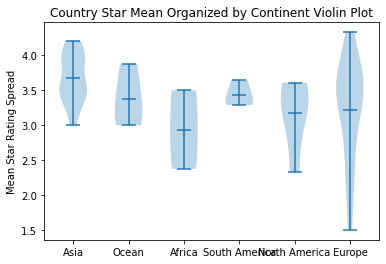

In [16]:
plt.violinplot([Asiadat,Oceaniadat,Africadat,SAdat,NAdat,Europedat],showextrema=True, showmeans=True)

plt.title('Country Star Mean Organized by Continent Violin Plot')
plt.xticks([1,2,3,4,5,6],['Asia','Ocean','Africa','South America', 'North America', 'Europe'])
plt.ylabel('Mean Star Rating Spread')

plt.show()


In conclusion:
There is some truth in that Star Mean Rating and # of ramen occurences within a data set can be used to determine a ramen's continent of origin, while it is not the highest of prediction scores it is still a decent probability of predicting the continent of origin correctly. The manipulation of data does reveal that Asia generally has the best ramen and as a result my hypothesis is supported. This is proved by the fact that 3/5 countries with the top 5 highest star mean ratings are from Asia and 65 out of 79 ramen brands with the highest star rating also hail from Asian countries. The violin plot also shows the continent's star rating mean is higher than the other continents. 